In [120]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# 输出矢量图
%config InlineBackend.figure_format = 'svg'

In [98]:
BikeData = pd.read_csv('sharebike.csv')

# 数据清洗

In [99]:
BikeData.shape

(10886, 12)

In [100]:
# 查看表中数据类型，是否存在缺失值
BikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [101]:
BikeData.head()
# season：1=春天，2=夏天，3=秋天，4=冬天
# workingday：1=工作日，0=周末
# weather：1=晴天，多云，2=雾天，阴雨，3=小雪，小雨，4=大雨，大雪，大雾
# temp：气温
# atemp：体温
# casual：非注册用户个数
# registered：注册用户个数
# count：给定日期时间（每小时）总租车人数，是casual和registered的和

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011/1/1 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011/1/1 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011/1/1 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011/1/1 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011/1/1 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# 数据处理——得到date、hour、week、month信息

In [102]:
# 自定义函数从datatime中获取date
def get_date(x):
    return x.strip().split(' ')[0]
# apply调用自定义函数get_date，在BikeData中增加date列
BikeData['date'] = BikeData.datetime.apply(get_date)
# 自定义函数从datetime中获取时间hour
def get_hour(x):
    hour = x.strip().split(' ')[1].split(':')[0]
    return int(hour) # 此处需要将hour的数据类型由字符串转换为数值类型，因为字符串数据排序不按数值型数据规则
# apply调用自定义函数get_hour，在BikeData中增加hour列
BikeData['hour'] = BikeData.datetime.apply(get_hour)

In [103]:
type(BikeData.hour[0])

numpy.int64

In [104]:
# 自定义函数从date列获取weekday——当天为一周中的星期几
def get_week(x):
    date = datetime.strptime(x, '%Y/%m/%d')# 调用datetime中的strptime函数将字符串型日期转化为日期时间格式
    weekday = date.weekday()
    return weekday
BikeData['weekday'] = BikeData.date.apply(get_week)

# 自定义函数从date列获取month
def get_month(x):
    date = datetime.strptime(x, '%Y/%m/%d')
    month = date.month
    return month
BikeData['month'] = BikeData.date.apply(get_month)

In [105]:
BikeData.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011/1/1 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011/1/1,0,5,1
1,2011/1/1 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011/1/1,1,5,1
2,2011/1/1 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011/1/1,2,5,1
3,2011/1/1 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011/1/1,3,5,1
4,2011/1/1 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011/1/1,4,5,1


# 相关性分析

In [106]:
correlation = BikeData[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','count']].corr()

In [107]:
correlation

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


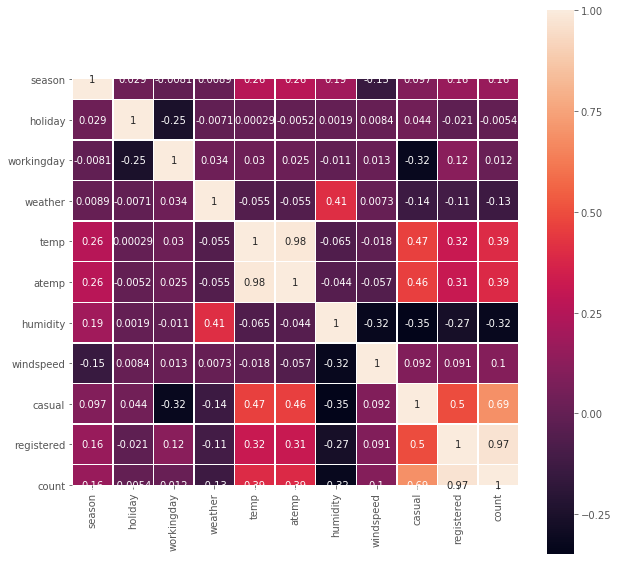

In [108]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, square=True, annot=True, vmax=1, linewidths=0.5)

# 租车人数在各分类变量下的箱线图

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Workingday'),
 Text(0.5, 1.0, 'Box plot on count across workingday')]

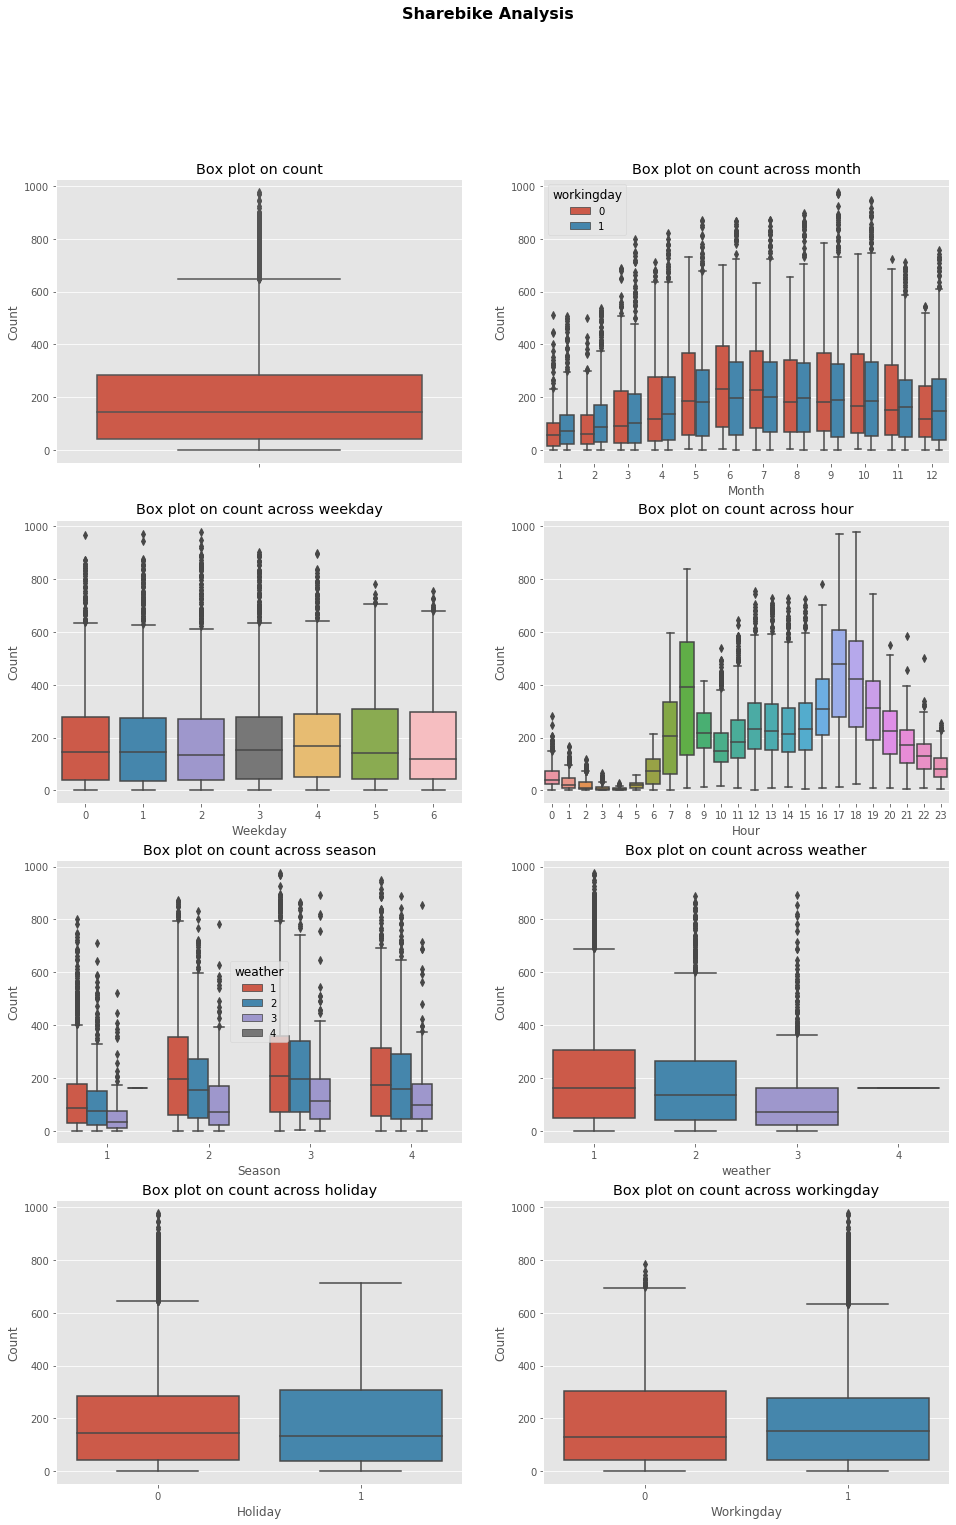

In [109]:
# 设置图风格和大小
plt.style.use('ggplot')
fig = plt.figure(figsize=(16,24))

# 设置多图大标题
fig.suptitle('Sharebike Analysis', fontsize=16, fontweight='bold')

# 添加第一个子图
ax1 = fig.add_subplot(4, 2, 1)
sns.boxplot(data=BikeData, y='count')
plt.title('Box plot on count')
plt.ylabel('Count')

# 添加第二个子图
ax2 = fig.add_subplot(4, 2, 2)
sns.boxplot(data=BikeData, x='month', y='count', hue='workingday')
ax2.set(ylabel='Count', xlabel='Month', title='Box plot on count across month')

# 添加第三个子图
ax3 = fig.add_subplot(4, 2, 3)
sns.boxplot(data=BikeData, x='weekday', y='count')
ax3.set(ylabel='Count', xlabel='Weekday', title='Box plot on count across weekday')

# 添加第四个子图
ax4 = fig.add_subplot(4, 2, 4)
sns.boxplot(data=BikeData, x='hour', y='count')
ax4.set(ylabel='Count', xlabel='Hour', title='Box plot on count across hour')

# 添加第五个子图
ax5 = fig.add_subplot(4, 2, 5)
sns.boxplot(data=BikeData, x='season', y='count', hue='weather')
ax5.set(ylabel='Count', xlabel='Season', title='Box plot on count across season')

# 添加第六个子图
ax6 = fig.add_subplot(4, 2, 6)
sns.boxplot(data=BikeData, x='weather', y='count')
ax6.set(ylabel='Count', xlabel='weather', title='Box plot on count across weather')

# 添加第七个子图
ax7 = fig.add_subplot(4, 2, 7)
sns.boxplot(data=BikeData, x='holiday', y='count')
ax7.set(ylabel='Count', xlabel='Holiday', title='Box plot on count across holiday')

# 添加第八个子图
ax8 = fig.add_subplot(4, 2, 8)
sns.boxplot(data=BikeData, x='workingday', y='count')
ax8.set(ylabel='Count', xlabel='Workingday', title='Box plot on count across workingday')

# 连续变量与租车人数的关系

In [110]:
# 连续变量离散化，温度分为4个区间，湿度分为5个区间
BikeData['temp_band'] = pd.cut(BikeData.temp, 4)
BikeData['humidity_band'] = pd.cut(BikeData.humidity, 5)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

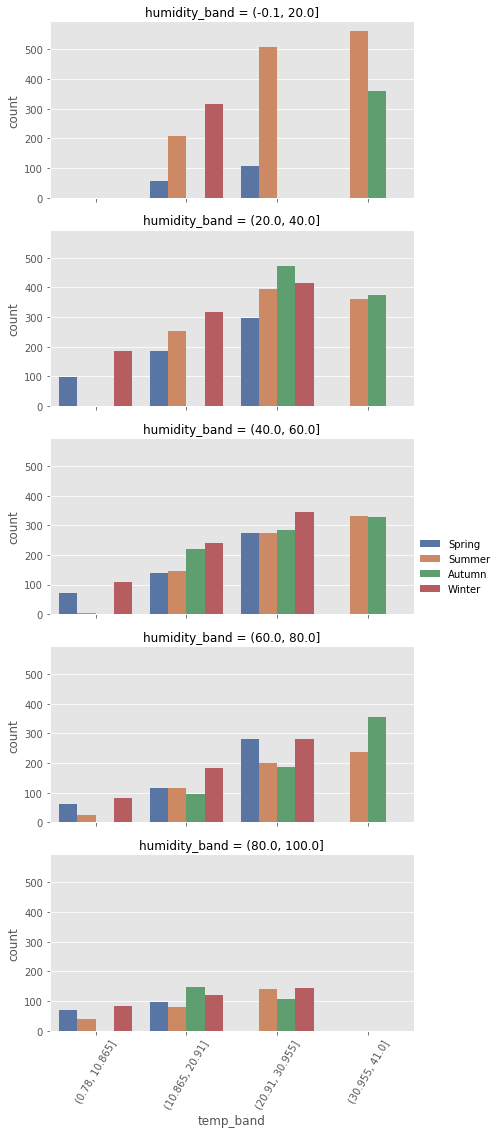

In [116]:
# 调用map函数，将季节1、2、3、4对应到春、夏、秋、冬
BikeData['season_word'] = BikeData.season.map({1:'Spring', 2:'Summer', 3:'Autumn', 4:'Winter'})

# aspect为长宽比,ci为不确定度
sns.FacetGrid(BikeData, row='humidity_band', aspect=2).\
map(sns.barplot, 'temp_band', 'count', 'season_word', order=None, hue_order=['Spring', 'Summer', 'Autumn', 'Winter'], palette='deep', ci=None).\
add_legend()
plt.xticks(rotation=60)

# 不同季节下，各时段的租车人数情况

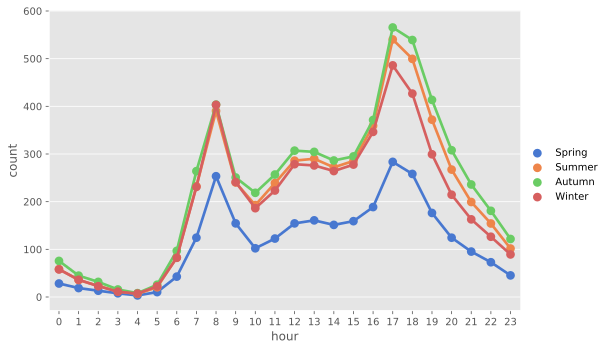

In [118]:
plt.style.use('ggplot')
sns.FacetGrid(BikeData, height=5, aspect=1.5).\
map(sns.pointplot, 'hour', 'count', 'season_word',order=None, hue_order=['Spring', 'Summer', 'Autumn', 'Winter'], palette='muted', ci=None).\
add_legend()

# 工作日与非工作日，各小时租车人数情况

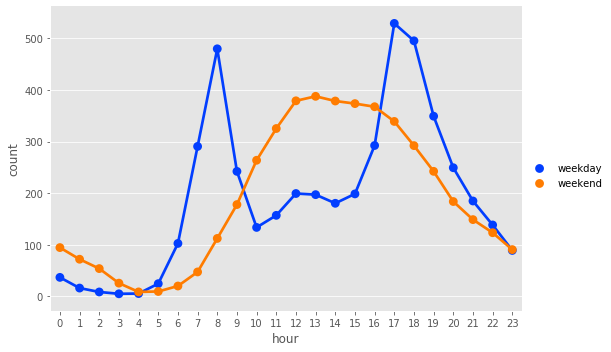

In [113]:
BikeData['workingday_word'] = BikeData.workingday.map({1: 'weekday', 0: 'weekend'})
sns.FacetGrid(BikeData, height=5, aspect=1.5).\
map(sns.pointplot, 'hour', 'count', 'workingday_word', order=None, hue_order=['weekday', 'weekend'], palette='bright', ci=None).\
add_legend()

# 不同天气下，各月份的租车人数

weather_word,foggy,rainy,stormy,sunny
month,,,,
1,77.679654,44.983333,164,99.792230
2,108.008439,76.352273,无,115.965278
3,133.052632,55.571429,无,164.358714
4,145.609959,83.868421,无,212.729730
5,197.020906,135.546392,无,247.071970
6,236.333333,161.431373,无,249.574156
7,237.135484,182.230769,无,237.818942
8,243.876923,180.952381,无,236.330275
9,216.826772,130.443299,无,259.501792


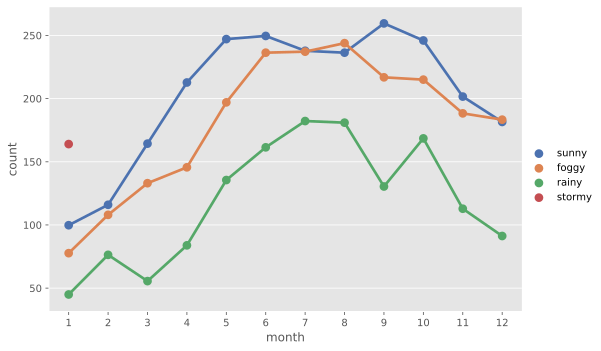

In [119]:
BikeData['weather_word'] = BikeData['weather'].map({1:'sunny', 2:'foggy', 3:'rainy', 4:'stormy'})
sns.FacetGrid(BikeData, height=5, aspect=1.5).\
map(sns.pointplot, 'month', 'count', 'weather_word', order=None, hue_order=['sunny', 'foggy', 'rainy', 'stormy'], palette='deep', ci=None).\
add_legend()

# 数据透视表的呈现
BikeData[['count', 'month', 'weather_word']].pivot_table(index='month', values='count', columns='weather_word', aggfunc='mean', fill_value='无')